In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
train = pd.read_csv('train.csv')
train = train.set_index('id')
test = pd.read_csv('test.csv')
ID = test['id']
test = test.set_index('id')
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
test.shape

(127037, 10)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [5]:
train.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

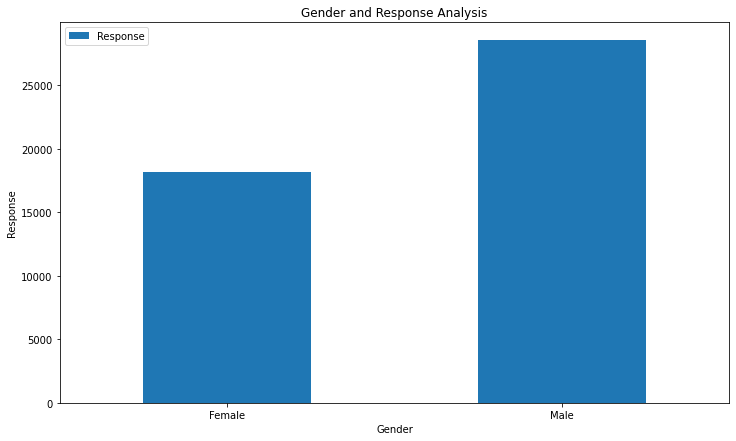

In [7]:
Gender_pivot = \
train.pivot_table(index='Gender', values="Response", aggfunc=np.sum)
Gender_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Response")
plt.title("Gender and Response Analysis")
plt.xticks(rotation=0)
plt.show()

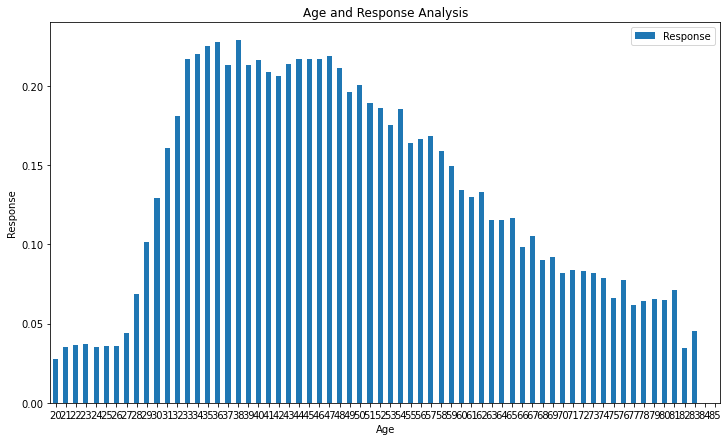

In [8]:
Age_pivot = \
train.pivot_table(index='Age', values="Response", aggfunc=np.mean)
Age_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Response")
plt.title("Age and Response Analysis")
plt.xticks(rotation=0)
plt.show()

In [9]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [10]:
train.Gender = train.Gender.map({'Female':0,'Male':1})
test.Gender = test.Gender.map({'Female':0,'Male':1})

In [11]:
train.Vehicle_Damage = train.Vehicle_Damage.map({'No':0,'Yes':1})
test.Vehicle_Damage = test.Vehicle_Damage.map({'No':0,'Yes':1})

In [12]:
le = LabelEncoder()
train['Vehicle_Age'] = le.fit_transform(train['Vehicle_Age'])
test['Vehicle_Age'] = le.transform(test['Vehicle_Age'])

In [13]:
X = train.drop('Response',axis=1)
y = train['Response']

In [14]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=42)

### Model 1

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [17]:
acc = roc_auc_score(y_test,y_preds)
acc

0.5

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_preds = dt.predict(X_test)
roc_auc_score(y_test,y_preds)

0.5968996353608083

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,max_depth=5)
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)
roc_auc_score(y_test,y_preds)

0.5

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_preds = gbc.predict(X_test)
roc_auc_score(y_test,y_preds)

0.49995514354066983

In [20]:
result = dt.predict(test)

In [22]:
sub = pd.read_csv('sample_submission.csv')
sub['id'] = ID
sub['Response'] = result
sub.to_csv('sub1.csv',index=False)